In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

In [2]:
train_data=pd.read_csv('train.csv')
validation_data=pd.read_csv('test.csv')
target='SalePrice'

In [3]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
validation_data[target]=np.nan
df=pd.concat([train_data,validation_data])
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [5]:
def numerical_features(data):
     return data.select_dtypes(include='number').columns.tolist()
def categorical_features(data):
     return data.select_dtypes(exclude='number').columns.tolist()
def remove_features(data,col):
    return data.drop(col,axis=1)
def splitX_y(data,target_features):
     X=data.drop(target_features,axis=1)
     y=data[target_features]
     return X,y
def train_test_split(X,y):
     return train_test_split(X,y,test_size=0.2,random_state=42)

In [6]:
def barplot(data,col,height=10,width=6):
    plt.figure(figsize=(width, height))
    sns.barplot(data,x=col,y='column_name')
    plt.show()
    

In [7]:
num_features=numerical_features(df)
cat_features=categorical_features(df)

In [8]:
def describe_data(data):
    num_features=numerical_features(data)
   
    return pd.DataFrame({
        'column_name': data.columns ,
        'd_type': data.dtypes,
        'count': data.count(),
        'min': [round(data[col].min(), 2) if col in num_features else '' for col in data.columns],
        '25%': [round(data[col].quantile(0.25), 2) if col in num_features else '' for col in data.columns],
        '50%': [round(data[col].quantile(0.5), 2) if col in num_features else '' for col in data.columns],
        '75%': [round(data[col].quantile(0.75), 2) if col in num_features else '' for col in data.columns],
        'mean': [round(data[col].mean(), 2) if col in num_features else '' for col in data.columns],
        'mode': ['' if data[col].mode().empty else data[col].mode().iloc[0] for col in data.columns],
        'mode #': [data[col].value_counts().max() if not data[col].mode().empty else '' for col in data.columns],
        'unique':  [data[col].unique() if  data[col].nunique() < 100  else '' for col in data.columns],
        'nunique': [data[col].nunique() for col in data.columns],
        'null #': [data[col].isnull().sum() for col in data.columns],
        'null %': [round(data[col].isnull().mean() * 100, 2) for col in data.columns]
    })
    

In [9]:
describe_num=describe_data(df[num_features])
describe_cat=describe_data(df[cat_features])

In [10]:
describe_cat

,column_name,d_type,count,min,25%,50%,75%,mean,mode,mode #,unique,nunique,null #,null %
MSZoning,MSZoning,object,2915,,,,,,RL,2265,"[RL, RM, C (all), FV, RH, nan]",5,4,0.14
Street,Street,object,2919,,,,,,Pave,2907,"[Pave, Grvl]",2,0,0.00
Alley,Alley,object,198,,,,,,Grvl,120,"[nan, Grvl, Pave]",2,2721,93.22
LotShape,LotShape,object,2919,,,,,,Reg,1859,"[Reg, IR1, IR2, IR3]",4,0,0.00
LandContour,LandContour,object,2919,,,,,,Lvl,2622,"[Lvl, Bnk, Low, HLS]",4,0,0.00
Utilities,Utilities,object,2917,,,,,,AllPub,2916,"[AllPub, NoSeWa, nan]",2,2,0.07
LotConfig,LotConfig,object,2919,,,,,,Inside,2133,"[Inside, FR2, Corner, CulDSac, FR3]",5,0,0.00
LandSlope,LandSlope,object,2919,,,,,,Gtl,2778,"[Gtl, Mod, Sev]",3,0,0.00
Neighborhood,Neighborhood,object,2919,,,,,,NAmes,443,"[CollgCr, Veenker, Crawfor, NoRidge, Mitchel, ...",25,0,0.00
Condition1,Condition1,object,2919,,,,,,Norm,2511,"[Norm, Feedr, PosN, Artery, RRAe, RRNn, RRAn, ...",9,0,0.00


In [11]:
describe_num

,column_name,d_type,count,min,25%,50%,75%,mean,mode,mode #,unique,nunique,null #,null %
Id,Id,int64,2919,1.0,730.5,1460.0,2189.5,1460.00,1.0,1,,2919,0,0.00
MSSubClass,MSSubClass,int64,2919,20.0,20.0,50.0,70.0,57.14,20.0,1079,"[60, 20, 70, 50, 190, 45, 90, 120, 30, 85, 80,...",16,0,0.00
LotFrontage,LotFrontage,float64,2433,21.0,59.0,68.0,80.0,69.31,60.0,276,,128,486,16.65
LotArea,LotArea,int64,2919,1300.0,7478.0,9453.0,11570.0,10168.11,9600.0,44,,1951,0,0.00
OverallQual,OverallQual,int64,2919,1.0,5.0,6.0,7.0,6.09,5.0,825,"[7, 6, 8, 5, 9, 4, 10, 3, 1, 2]",10,0,0.00
OverallCond,OverallCond,int64,2919,1.0,5.0,5.0,6.0,5.56,5.0,1645,"[5, 8, 6, 7, 4, 2, 3, 9, 1]",9,0,0.00
YearBuilt,YearBuilt,int64,2919,1872.0,1953.5,1973.0,2001.0,1971.31,2005.0,142,,118,0,0.00
YearRemodAdd,YearRemodAdd,int64,2919,1950.0,1965.0,1993.0,2004.0,1984.26,1950.0,361,"[2003, 1976, 2002, 1970, 2000, 1995, 2005, 197...",61,0,0.00
MasVnrArea,MasVnrArea,float64,2896,0.0,0.0,0.0,164.0,102.20,0.0,1738,,444,23,0.79
BsmtFinSF1,BsmtFinSF1,float64,2918,0.0,0.0,368.5,733.0,441.42,0.0,929,,991,1,0.03


In [12]:
def checknull_perc(data,threshold=50):
    if not (data['null %']>threshold).any() :
        print(f'no columns with more then { threshold }% of null values')
    else:
        barplot(data[data['null %']>threshold],'null %',width=5,height=8)
    
        

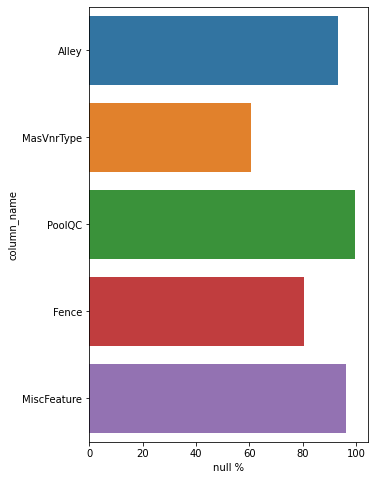

In [13]:
checknull_perc(describe_cat,)

In [14]:
checknull_perc(describe_num)

no columns with more then 50% of null values


In [15]:
df=remove_features(df,describe_cat[describe_cat['null %']>50]['column_name'])

In [16]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000.0


In [17]:
cat_features=categorical_features(df)
describe_num= describe_data(df[num_features])
describe_cat= describe_data(df[cat_features])

In [18]:
checknull_perc(describe_num)
print('-'*45)
checknull_perc(describe_cat)

no columns with more then 50% of null values
---------------------------------------------
no columns with more then 50% of null values


In [19]:
def check_numerical_cat(data,threshold=100):
    data=data.copy()

    data['unique']=data['unique'].apply(lambda x : len(x))
    if not ( data['unique'] < threshold).any() :
        print(f'no columns with less then { threshold } number of unique values')
    else:
        
        barplot(data[(data['unique']<threshold) & (data['unique']>1) ],'unique')
    return data[(data['unique']<threshold) & (data['unique']>1) ]['column_name'].tolist()
        

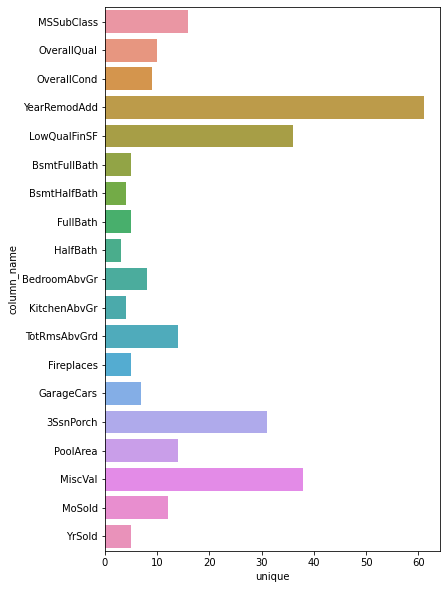

In [20]:
num_cat=check_numerical_cat(describe_num)

In [21]:
num_features=[i for i in num_features if i not in num_cat]

In [22]:
describe_data(df[num_features])

,column_name,d_type,count,min,25%,50%,75%,mean,mode,mode #,unique,nunique,null #,null %
Id,Id,int64,2919,1.0,730.5,1460.0,2189.5,1460.00,1.0,1,,2919,0,0.00
LotFrontage,LotFrontage,float64,2433,21.0,59.0,68.0,80.0,69.31,60.0,276,,128,486,16.65
LotArea,LotArea,int64,2919,1300.0,7478.0,9453.0,11570.0,10168.11,9600.0,44,,1951,0,0.00
YearBuilt,YearBuilt,int64,2919,1872.0,1953.5,1973.0,2001.0,1971.31,2005.0,142,,118,0,0.00
MasVnrArea,MasVnrArea,float64,2896,0.0,0.0,0.0,164.0,102.20,0.0,1738,,444,23,0.79
BsmtFinSF1,BsmtFinSF1,float64,2918,0.0,0.0,368.5,733.0,441.42,0.0,929,,991,1,0.03
BsmtFinSF2,BsmtFinSF2,float64,2918,0.0,0.0,0.0,0.0,49.58,0.0,2571,,272,1,0.03
BsmtUnfSF,BsmtUnfSF,float64,2918,0.0,220.0,467.0,805.5,560.77,0.0,241,,1135,1,0.03
TotalBsmtSF,TotalBsmtSF,float64,2918,0.0,793.0,989.5,1302.0,1051.78,0.0,78,,1058,1,0.03
1stFlrSF,1stFlrSF,int64,2919,334.0,876.0,1082.0,1387.5,1159.58,864.0,46,,1083,0,0.00


In [23]:
describe_data(df[cat_features])

,column_name,d_type,count,min,25%,50%,75%,mean,mode,mode #,unique,nunique,null #,null %
MSZoning,MSZoning,object,2915,,,,,,RL,2265,"[RL, RM, C (all), FV, RH, nan]",5,4,0.14
Street,Street,object,2919,,,,,,Pave,2907,"[Pave, Grvl]",2,0,0.00
LotShape,LotShape,object,2919,,,,,,Reg,1859,"[Reg, IR1, IR2, IR3]",4,0,0.00
LandContour,LandContour,object,2919,,,,,,Lvl,2622,"[Lvl, Bnk, Low, HLS]",4,0,0.00
Utilities,Utilities,object,2917,,,,,,AllPub,2916,"[AllPub, NoSeWa, nan]",2,2,0.07
LotConfig,LotConfig,object,2919,,,,,,Inside,2133,"[Inside, FR2, Corner, CulDSac, FR3]",5,0,0.00
LandSlope,LandSlope,object,2919,,,,,,Gtl,2778,"[Gtl, Mod, Sev]",3,0,0.00
Neighborhood,Neighborhood,object,2919,,,,,,NAmes,443,"[CollgCr, Veenker, Crawfor, NoRidge, Mitchel, ...",25,0,0.00
Condition1,Condition1,object,2919,,,,,,Norm,2511,"[Norm, Feedr, PosN, Artery, RRAe, RRNn, RRAn, ...",9,0,0.00
Condition2,Condition2,object,2919,,,,,,Norm,2889,"[Norm, Artery, RRNn, Feedr, PosN, PosA, RRAn, ...",8,0,0.00


In [28]:
def fill_na(data):
    data = data.copy()
    for i in  ["MSZoning","Utilities",'Exterior1st','Exterior2nd','Electrical',"KitchenQual",'Functional','SaleType']:
        data[i] = data["Functional"].fillna(data[i].mode()[0])
    
    for i in ['BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu', 'GarageType','GarageFinish','GarageQual','GarageCond']:
        data[i] = data[i].fillna('NA')
    
    for i in ['LotFrontage','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','GarageYrBlt','GarageArea']:
        data=data[i].fillna(data[i].mean())
    
    return data 


In [25]:
describe_data(df[num_features])

,column_name,d_type,count,min,25%,50%,75%,mean,mode,mode #,unique,nunique,null #,null %
Id,Id,int64,2919,1.0,730.5,1460.0,2189.5,1460.00,1.0,1,,2919,0,0.00
LotFrontage,LotFrontage,float64,2433,21.0,59.0,68.0,80.0,69.31,60.0,276,,128,486,16.65
LotArea,LotArea,int64,2919,1300.0,7478.0,9453.0,11570.0,10168.11,9600.0,44,,1951,0,0.00
YearBuilt,YearBuilt,int64,2919,1872.0,1953.5,1973.0,2001.0,1971.31,2005.0,142,,118,0,0.00
MasVnrArea,MasVnrArea,float64,2896,0.0,0.0,0.0,164.0,102.20,0.0,1738,,444,23,0.79
BsmtFinSF1,BsmtFinSF1,float64,2918,0.0,0.0,368.5,733.0,441.42,0.0,929,,991,1,0.03
BsmtFinSF2,BsmtFinSF2,float64,2918,0.0,0.0,0.0,0.0,49.58,0.0,2571,,272,1,0.03
BsmtUnfSF,BsmtUnfSF,float64,2918,0.0,220.0,467.0,805.5,560.77,0.0,241,,1135,1,0.03
TotalBsmtSF,TotalBsmtSF,float64,2918,0.0,793.0,989.5,1302.0,1051.78,0.0,78,,1058,1,0.03
1stFlrSF,1stFlrSF,int64,2919,334.0,876.0,1082.0,1387.5,1159.58,864.0,46,,1083,0,0.00


In [26]:
describe_data(df[num_cat])

,column_name,d_type,count,min,25%,50%,75%,mean,mode,mode #,unique,nunique,null #,null %
MSSubClass,MSSubClass,int64,2919,20.0,20.0,50.0,70.0,57.14,20.0,1079,"[60, 20, 70, 50, 190, 45, 90, 120, 30, 85, 80,...",16,0,0.00
OverallQual,OverallQual,int64,2919,1.0,5.0,6.0,7.0,6.09,5.0,825,"[7, 6, 8, 5, 9, 4, 10, 3, 1, 2]",10,0,0.00
OverallCond,OverallCond,int64,2919,1.0,5.0,5.0,6.0,5.56,5.0,1645,"[5, 8, 6, 7, 4, 2, 3, 9, 1]",9,0,0.00
YearRemodAdd,YearRemodAdd,int64,2919,1950.0,1965.0,1993.0,2004.0,1984.26,1950.0,361,"[2003, 1976, 2002, 1970, 2000, 1995, 2005, 197...",61,0,0.00
LowQualFinSF,LowQualFinSF,int64,2919,0.0,0.0,0.0,0.0,4.69,0.0,2879,"[0, 360, 513, 234, 528, 572, 144, 392, 371, 39...",36,0,0.00
BsmtFullBath,BsmtFullBath,float64,2917,0.0,0.0,0.0,1.0,0.43,0.0,1705,"[1.0, 0.0, 2.0, 3.0, nan]",4,2,0.07
BsmtHalfBath,BsmtHalfBath,float64,2917,0.0,0.0,0.0,0.0,0.06,0.0,2742,"[0.0, 1.0, 2.0, nan]",3,2,0.07
FullBath,FullBath,int64,2919,0.0,1.0,2.0,2.0,1.57,2.0,1530,"[2, 1, 3, 0, 4]",5,0,0.00
HalfBath,HalfBath,int64,2919,0.0,0.0,0.0,1.0,0.38,0.0,1834,"[1, 0, 2]",3,0,0.00
BedroomAbvGr,BedroomAbvGr,int64,2919,0.0,2.0,3.0,3.0,2.86,3.0,1596,"[3, 4, 1, 2, 0, 5, 6, 8]",8,0,0.00
